# Comprehensive Guide to Pandas

This notebook provides a detailed overview of the pandas library, from basic concepts to advanced functionalities. It's designed as a reference sheet for students and practitioners alike.

## 1. Introduction to Pandas Data Structures

Pandas is built around two primary data structures: `Series` and `DataFrame`.

### Series
A `Series` is a one-dimensional labeled array capable of holding any data type.

In [1]:
import pandas as pd
import numpy as np

s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### DataFrame
A `DataFrame` is a two-dimensional labeled data structure with columns of potentially different types. It is the most commonly used pandas object.

In [2]:
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2023-01-01  0.507372  1.408655  0.968757 -0.450535
2023-01-02 -0.750279  1.253202 -1.308809 -0.125319
2023-01-03  0.166643  0.641309  0.180136  0.858001
2023-01-04 -0.655745 -1.244763 -2.480349 -2.025665
2023-01-05  0.982473 -0.779819 -0.479011  1.735008
2023-01-06  0.408712 -0.466234  0.495323 -0.009194


## 2. Data Inspection

Essential methods for getting a quick overview of your DataFrame.

In [30]:
print('df.head()')
print(df.head(2))

df.head()
                   A         B         C         D
2023-01-01  0.507372  1.408655  0.968757 -0.450535
2023-01-02 -0.750279  1.253202 -1.308809 -0.125319


In [31]:
print('df.tail()')
print(df.tail(2))

df.tail()
                   A         B         C         D
2023-01-05  0.982473 -0.779819 -0.479011  1.735008
2023-01-06  0.408712 -0.466234  0.495323 -0.009194


In [32]:
print('df.index')
print(df.index)

df.index
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')


In [33]:
print('df.columns')
print(df.columns)

df.columns
Index(['A', 'B', 'C', 'D'], dtype='object')


In [34]:
print('df.info()')
df.info()

df.info()
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 to 2023-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 412.0 bytes


In [29]:
print('df.describe()')
print(df.describe())

df.describe()
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.109863  0.135392 -0.437325 -0.002951
std    0.683812  1.116337  1.277758  1.270312
min   -0.750279 -1.244763 -2.480349 -2.025665
25%   -0.450148 -0.701423 -1.101359 -0.369231
50%    0.287678  0.087538 -0.149438 -0.067257
75%    0.482707  1.100229  0.416526  0.641202
max    0.982473  1.408655  0.968757  1.735008


## 3. Data Selection and Indexing

Pandas supports various ways to select and index data.

### Column Selection

In [4]:
df['A'] # Select a single column

2023-01-01    0.507372
2023-01-02   -0.750279
2023-01-03    0.166643
2023-01-04   -0.655745
2023-01-05    0.982473
2023-01-06    0.408712
Freq: D, Name: A, dtype: float64

### Row Selection (Slicing)

In [5]:
df[0:3] # Select first 3 rows

,A,B,C,D
2023-01-01,0.507372,1.408655,0.968757,-0.450535
2023-01-02,-0.750279,1.253202,-1.308809,-0.125319
2023-01-03,0.166643,0.641309,0.180136,0.858001


### Selection by Label (`loc`)
Use `loc` for selection by label (index name).

In [6]:
df.loc[dates[0]] # Select row by date label

A    0.507372
B    1.408655
C    0.968757
D   -0.450535
Name: 2023-01-01 00:00:00, dtype: float64

### Selection by Position (`iloc`)
Use `iloc` for selection by integer position.

In [7]:
df.iloc[3] # Select the 4th row (0-indexed)

A   -0.655745
B   -1.244763
C   -2.480349
D   -2.025665
Name: 2023-01-04 00:00:00, dtype: float64

### Boolean Indexing
Filter data based on conditions.

In [8]:
df[df['A'] > 0] # Select rows where column 'A' is positive

,A,B,C,D
2023-01-01,0.507372,1.408655,0.968757,-0.450535
2023-01-03,0.166643,0.641309,0.180136,0.858001
2023-01-05,0.982473,-0.779819,-0.479011,1.735008
2023-01-06,0.408712,-0.466234,0.495323,-0.009194


## 4. Data Cleaning

Real-world data is often messy. Pandas provides powerful tools for cleaning it.

### Handling Missing Data (`NaN`)

In [35]:
df_missing = df.copy()
df_missing.iloc[1, 1] = np.nan # Introduce a missing value

In [38]:
print('Dropping rows with missing data:')
print(df_missing.dropna(how='any'))

Dropping rows with missing data:
                   A         B         C         D
2023-01-01  0.507372  1.408655  0.968757 -0.450535
2023-01-03  0.166643  0.641309  0.180136  0.858001
2023-01-04 -0.655745 -1.244763 -2.480349 -2.025665
2023-01-05  0.982473 -0.779819 -0.479011  1.735008
2023-01-06  0.408712 -0.466234  0.495323 -0.009194


In [39]:
print('Filling missing data:')
print(df_missing.fillna(value=5))

Filling missing data:
                   A         B         C         D
2023-01-01  0.507372  1.408655  0.968757 -0.450535
2023-01-02 -0.750279  5.000000 -1.308809 -0.125319
2023-01-03  0.166643  0.641309  0.180136  0.858001
2023-01-04 -0.655745 -1.244763 -2.480349 -2.025665
2023-01-05  0.982473 -0.779819 -0.479011  1.735008
2023-01-06  0.408712 -0.466234  0.495323 -0.009194


## 5. Operations and Data Manipulation

### Applying Functions
Apply a function along an axis of the DataFrame.

In [10]:
df.apply(np.cumsum) # Cumulative sum

,A,B,C,D
2023-01-01,0.507372,1.408655,0.968757,-0.450535
2023-01-02,-0.242907,2.661857,-0.340051,-0.575854
2023-01-03,-0.076264,3.303166,-0.159916,0.282147
2023-01-04,-0.732009,2.058403,-2.640265,-1.743519
2023-01-05,0.250464,1.278584,-3.119276,-0.008510
2023-01-06,0.659176,0.812351,-2.623953,-0.017704


### Sorting
Sort by index or by values.

In [11]:
print('Sort by axis:', df.sort_index(axis=1, ascending=False))
print('Sort by values:', df.sort_values(by='B'))

Sort by axis:                    D         C         B         A
2023-01-01 -0.450535  0.968757  1.408655  0.507372
2023-01-02 -0.125319 -1.308809  1.253202 -0.750279
2023-01-03  0.858001  0.180136  0.641309  0.166643
2023-01-04 -2.025665 -2.480349 -1.244763 -0.655745
2023-01-05  1.735008 -0.479011 -0.779819  0.982473
2023-01-06 -0.009194  0.495323 -0.466234  0.408712
Sort by values:                    A         B         C         D
2023-01-04 -0.655745 -1.244763 -2.480349 -2.025665
2023-01-05  0.982473 -0.779819 -0.479011  1.735008
2023-01-06  0.408712 -0.466234  0.495323 -0.009194
2023-01-03  0.166643  0.641309  0.180136  0.858001
2023-01-02 -0.750279  1.253202 -1.308809 -0.125319
2023-01-01  0.507372  1.408655  0.968757 -0.450535


## 6. Merging, Joining, and Concatenating

Pandas provides various facilities for easily combining together Series or DataFrame objects.

### Concatenating (`concat`)

In [12]:
df_concat = pd.DataFrame(np.random.randn(2, 4), columns=list('ABCD'))
pd.concat([df, df_concat])

,A,B,C,D
2023-01-01 00:00:00,0.507372,1.408655,0.968757,-0.450535
2023-01-02 00:00:00,-0.750279,1.253202,-1.308809,-0.125319
2023-01-03 00:00:00,0.166643,0.641309,0.180136,0.858001
2023-01-04 00:00:00,-0.655745,-1.244763,-2.480349,-2.025665
2023-01-05 00:00:00,0.982473,-0.779819,-0.479011,1.735008
2023-01-06 00:00:00,0.408712,-0.466234,0.495323,-0.009194
0,-0.772492,0.294400,0.857853,-0.386162
1,-1.217443,-1.085199,0.728118,-0.093191


### Merging (`merge`)
SQL-style merging of DataFrames.

In [13]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## 7. Grouping and Aggregation (`groupby`)

The `groupby` operation involves splitting the data, applying a function, and combining the results.

In [14]:
df_group = pd.DataFrame({"A": ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})

df_group.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.588321,-0.754978
foo,onetwotwoonethree,1.049837,3.680032


## 8. Reshaping Data

Methods to reshape the structure of your DataFrame.

### Pivot Tables (`pivot_table`)

In [15]:
pd.pivot_table(df_group, values='D', index=['A'], columns=['B'])

B,one,three,two
A,,,
bar,1.384057,-1.134293,-1.004741
foo,0.771410,-0.085524,1.111368


## 9. Time Series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion.

In [16]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

# Resample to 1-month frequency and take the mean
ts.resample('M').mean()

2000-01-31    -1.123906
2000-02-29     2.437286
2000-03-31     3.944203
2000-04-30     6.042076
2000-05-31    11.302788
2000-06-30    18.459289
2000-07-31    20.546478
2000-08-31    22.598428
2000-09-30    26.160371
2000-10-31    26.032366
2000-11-30    26.522560
2000-12-31    22.096273
2001-01-31    20.949435
2001-02-28    15.049359
2001-03-31    10.434468
2001-04-30    10.386623
2001-05-31    14.474989
2001-06-30    13.538575
2001-07-31    14.188572
2001-08-31    12.944738
2001-09-30     7.080661
2001-10-31     3.470537
2001-11-30    -2.910253
2001-12-31    -0.983740
2002-01-31     0.216607
2002-02-28     1.012137
2002-03-31     3.945289
2002-04-30     2.808426
2002-05-31    -1.049389
2002-06-30    -3.950462
2002-07-31    -4.346725
2002-08-31    -0.719130
2002-09-30     0.544887
Freq: M, dtype: float64

### Rolling Windows
Provides rolling window calculations.

<Axes: >

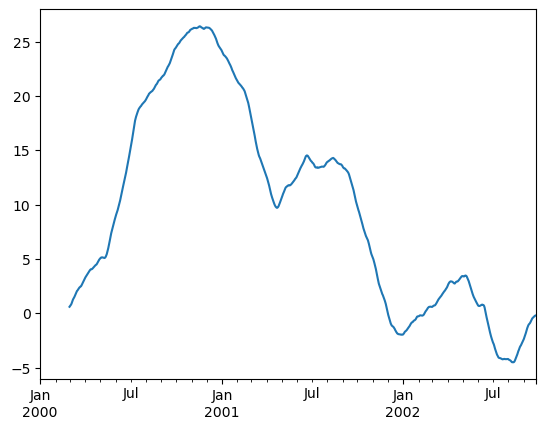

In [17]:
ts.rolling(window=60).mean().plot()

## 10. Advanced Topics


### Categorical Data
Pandas can include categorical data in a DataFrame. This can save memory and show appropriate statistical treatment.

In [18]:
df_cat = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df_cat["grade"] = df_cat["raw_grade"].astype("category")
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 366.0+ bytes


In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
